# Richie's simple guide on timeseries using neural networks
## CNN on Time Series Analysis

In [27]:
import xarray as xr
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

In [2]:
ts=xr.open_dataset(r'D:\AJR\NCPOR\ANT_TB3_Final_Train_daily.nc') #opening the netcdf file using xarray 

In [3]:
df1 = ts.to_dataframe()
df1
print(df1) #converting into dataframe

                  VB1      WD1        WS1       DBT1        MSLP1
TAX1                                                             
1985-02-26  96.222222  11.0000  18.666667 -10.444444   982.988889
1985-02-27  98.000000  28.6250  11.187500 -10.000000   982.593750
1985-02-28  98.000000  61.8750   2.000000 -17.500000   981.412500
1985-03-01  97.812500  50.0625   9.812500 -15.212500   987.062500
1985-03-02  96.312500  12.4375  27.625000 -10.525000   988.656250
...               ...      ...        ...        ...          ...
2010-12-27  97.000000  35.9375   2.375000  -5.793750   986.987500
2010-12-28  97.000000  34.0625   2.812500  -5.425000   988.550000
2010-12-29  97.000000  13.8125  10.437500  -4.487500  1001.868750
2010-12-30  97.000000  11.1250  27.375000  -3.343750  1004.575000
2010-12-31  97.000000  13.0625  39.750000  -0.218750   998.475000

[9440 rows x 5 columns]


In [4]:
df1['TAX1'] = pd.to_datetime(df1.index)
#tax1 is known as observation time stamp

In [5]:
l=df1.loc['1990-01-01':'1995-12-31']
l
l=l[["DBT1"]]
print(l) #slicing the data on our desired periods here I've taken 6 years from 1990 - 1995

               DBT1
TAX1               
1990-01-01 -1.26875
1990-01-02 -1.86875
1990-01-03 -0.99375
1990-01-04 -1.22500
1990-01-05 -0.56250
...             ...
1995-12-27 -5.71875
1995-12-28 -4.04375
1995-12-29 -3.00625
1995-12-30 -3.53125
1995-12-31 -3.86875

[2191 rows x 1 columns]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df= scaler.fit_transform(l)
print(df)

[[0.78672986]
 [0.76987888]
 [0.79445322]
 ...
 [0.73793225]
 [0.72318764]
 [0.71370897]]


In [7]:
l2=l.loc['1990-01-01':'1990-01-10']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
d= scaler.fit_transform(l2)
print(d)

[[0.86134969]
 [0.74355828]
 [0.91533742]
 [0.86993865]
 [1.        ]
 [0.67730061]
 [0.53742331]
 [0.26748466]
 [0.11288344]
 [0.        ]]


- Scales the data frame "l" using the scaler object and assigns the scaled values to the variable "df". 
- Here the variable “l” holds the sliced data from (1990-01-01 to 1995 - 12 -31). 
- Scale the data to a consistent range using Min-Max Scaling (0,1). 
- To explain this process concretely, let's consider a simple dataset of values: {2, 5, 8, 10}. 
- The first step in the min-max normalization process is to find the minimum and maximum values 
- in the dataset. In this case, the minimum value is 2, and the maximum value is 10. Next, 
- we subtract the minimum value from each value in the dataset to get the range of values, 
- and then divide each value by the range to obtain a new value between 0 and 1. 
- The formula for this transformation is:
- new_value = (old_value - min_value) / (max_value - min_value)
- Using this formula, we can transform each value in our dataset as follows:
- new_value(2) = (2 - 2) / (10 - 2) = 0
- new_value(5) = (5 - 2) / (10 - 2) = 0.375
- new_value(8) = (8 - 2) / (10 - 2) = 0.75
- new_value(10) = (10 - 2) / (10 - 2) = 1
- As you can see, the transformed values are all between 0 and 1, with values 
- closer to the minimum being closer to 0 and values closer to the maximum being closer to 1.


In [8]:
#spliting the data into training and testing
train_size = int(len(df) * 0.7)
train_df = df[:train_size]
test_df = df[train_size:]

In [9]:
print("The size of training data is :", train_df.size)
print("The size of testing data is :",test_df.size)
#printing the size 

The size of training data is : 1533
The size of testing data is : 658


In [10]:
model = Sequential()

- Sequential is a class in the Keras API of TensorFlow that represents a linear stack of layers in a deep learning model. 
- When you create an instance of Sequential, you can add layers to it using the .add() method. 
- Each subsequent layer added to the Sequential model receives as input the output of the previous layer. By stacking layers in a Sequential model,
- you can create a feedforward neural network, where the output of each layer flows into the next layer until the final output is produced.
- A feedforward neural network is a type of artificial neural network that is used in deep learning.
- It is called "feedforward" because the information flows through the network in one direction, from input to output, without loops or feedback connections.

In [11]:
kernel_size = 7
model.add(Conv1D(filters=64, kernel_size=kernel_size, activation='relu', input_shape=(kernel_size, 1)))

- Conv1D: This specifies the type of convolutional layer being added. In this case, it is a 1-dimensional convolutional layer.

- filters=64: This parameter specifies the number of filters to be used in the convolutional layer. 
- Filters are small matrices that are convolved with the input data to extract features. In this case, there will be 
64 filters applied to the input.

- kernel_size=7: This parameter specifies the size of the filters to be used. In this case, each filter will be a 7x1 matrix.

- activation='relu': This parameter specifies the activation function to be used in the convolutional layer. 
- In this case, the Rectified Linear Unit (ReLU) activation function will be used.

- input_shape=(7, 1): This parameter specifies the shape of the input data. 
- In this case, the input data will be a 1-dimensional vector with 7 timesteps and 1 feature per timestep. 
- This is a common shape for time series data.

- In the case of time series data going through a convolution layer, the input values are not necessarily binary (0 and 1), but can be any real number that represents the value of the time series at a particular point in time.
- For example, if you have a time series of temperature measurements, the input values could be temperatures in degrees Celsius or Fahrenheit.
- The convolution operation involves sliding a small kernel or filter over the input time series and 
- performing a dot product between the filter and the overlapping segment of the time series at each step. 
- The filter coefficients are learned during training and can take on any real value, not just 0 or 1.
- The output of the convolution operation at each step is a single value that represents the degree of similarity between 
- the filter and the overlapping segment of the time series. This output value can also take on any real value, not just 0 or 1.
- In summary, the input values and filter coefficients in a convolution layer for time series data can take on any real value, 
- not just 0 or 1. The output values of the convolution operation are also real numbers that represent the degree of similarity between the filter and the overlapping segment of the time series.

In [14]:
model.add(MaxPooling1D(pool_size=1))

- pool_size=1: This parameter specifies the size of the pooling window. In this case, it is a 1D pooling layer with a pool size of 1.
- MaxPooling1D is a type of pooling layer that is often used in convolutional neural networks for processing sequential data, 
- such as time series or text data. It works by reducing the dimensionality of the output of a convolutional layer by taking the maximum value within each window of a specified size.

- In this case, the MaxPooling1D layer will take the output from the previous Conv1D layer, which is a 1D tensor with 64 channels, and apply a max pooling operation with a window size of 2 to each channel separately.
- This will reduce the output tensor's length by half, effectively downsampling the data.

In [15]:
# Add two fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

- model.add(Dense(64, activation='relu')): This line adds a Dense layer with 64 neurons and the ReLU activation function.
- Dense layers are fully connected layers, meaning that each neuron in a layer is connected to every neuron in the previous layer. The number of neurons in a Dense layer is often a hyperparameter that can be tuned to improve the model's performance. The ReLU activation function is commonly used in neural networks to introduce non-linearity into the model, which can help the model learn complex patterns in the data.

- model.add(Dense(1)): This line adds another Dense layer with 1 neuron and no activation function specified. 
- The output of this layer will be a single scalar value, which is often used for regression problems, 
- where the goal is to predict a continuous value. For classification problems, where the goal is to predict a categorical label. 
- the number of neurons in the output layer would typically correspond to the number of classes to be predicted, and a softmax activation function would be used to produce a probability distribution over the classes.

- Together, these two Dense layers form the output layer of the neural network. 
- The output from the previous MaxPooling1D layer is flattened into a 1D vector and 
- passed through these layers to produce the final output prediction.

In [16]:
#Compile the model with a mean squared error loss function and an Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')


- loss='mean_squared_error': This parameter specifies the loss function to be used during training. 
- In this case, the mean squared error (MSE) loss function is used. 
- The MSE measures the average squared difference between the predicted and actual values, which is commonly used for regression problems.

- optimizer='adam': This parameter specifies the optimization algorithm to be used during training. 
- In this case, the Adam optimizer is used. Adam is an adaptive learning rate optimization algorithm that can help to speed up the training process and improve the accuracy of the model.

In [18]:
X_train = []
y_train = []

for i in range(7, len(train_df)):
    X_train.append(train_df[i-7:i, 0].reshape(-1, 1))
    y_train.append(train_df[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train, y_train)


[[[0.78672986]
  [0.76987888]
  [0.79445322]
  ...
  [0.80656486]
  [0.76040021]
  [0.74038968]]

 [[0.76987888]
  [0.79445322]
  [0.78795857]
  ...
  [0.76040021]
  [0.74038968]
  [0.70177286]]

 [[0.79445322]
  [0.78795857]
  [0.80656486]
  ...
  [0.74038968]
  [0.70177286]
  [0.67965596]]

 ...

 [[0.8832719 ]
  [0.86115499]
  [0.88116553]
  ...
  [0.81920309]
  [0.78725645]
  [0.75320344]]

 [[0.86115499]
  [0.88116553]
  [0.77970862]
  ...
  [0.78725645]
  [0.75320344]
  [0.75215025]]

 [[0.88116553]
  [0.77970862]
  [0.81920309]
  ...
  [0.75320344]
  [0.75215025]
  [0.72318764]]] [[0.70177286]
 [0.67965596]
 [0.66350711]
 ...
 [0.75215025]
 [0.72318764]
 [0.74021415]]



- X_train and y_train are two empty Python lists that will be used to store the input and output data, respectively.
- A for loop is then used to iterate over the rows of train_df starting from the 7th row.
- For each row, the code selects the previous 7 rows (inclusive of the current row) as the input and the current row as the output. 
- This is achieved by indexing the rows with the range i-7:i.
- The resulting 7x1 input array is flattened into a 1D array using the reshape() method and appended to X_train,
- while the corresponding output value is appended to y_train.
- The loop continues until the last row of train_df.

- Finally, the input and output data are converted to numpy arrays using the np.array() method and stored in X_train and y_train, respectively.

- The resulting X_train array has a shape of (n_samples, 7, 1), where n_samples is the number of input/output pairs created. 
- The first dimension corresponds to the number of samples, 
- the second dimension corresponds to the sequence length of each input, and the third dimension corresponds to the number of features in each input (in this case, there is only one feature).

- The resulting y_train array has a shape of (n_samples,), corresponding to the output values for each input.

In [21]:
X_test = []
y_test = []
for i in range(7, len(test_df)):
    X_test.append(test_df[i-7:i].reshape(-1, 1))
    y_test.append(test_df[i])

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test,y_test)

[[[0.71932596]
  [0.8334211 ]
  [0.88292084]
  ...
  [0.77953309]
  [0.75566087]
  [0.76584167]]

 [[0.8334211 ]
  [0.88292084]
  [0.86449008]
  ...
  [0.75566087]
  [0.76584167]
  [0.71283131]]

 [[0.88292084]
  [0.86449008]
  [0.77953309]
  ...
  [0.76584167]
  [0.71283131]
  [0.68562401]]

 ...

 [[0.67702299]
  [0.66508689]
  [0.64893804]
  ...
  [0.62348605]
  [0.6617518 ]
  [0.7087941 ]]

 [[0.66508689]
  [0.64893804]
  [0.63823065]
  ...
  [0.6617518 ]
  [0.7087941 ]
  [0.73793225]]

 [[0.64893804]
  [0.63823065]
  [0.62348605]
  ...
  [0.7087941 ]
  [0.73793225]
  [0.72318764]]] [[0.71283131]
 [0.68562401]
 [0.71002282]
 [0.69720906]
 [0.74653326]
 [0.6640337 ]
 [0.65174653]
 [0.64367211]
 [0.69194313]
 [0.65350184]
 [0.64806038]
 [0.66438476]
 [0.70896963]
 [0.73758118]
 [0.70633667]
 [0.62927857]
 [0.67245919]
 [0.70194839]
 [0.71476216]
 [0.7116026 ]
 [0.74126733]
 [0.70001755]
 [0.54906091]
 [0.58311392]
 [0.6294541 ]
 [0.56222573]
 [0.5943479 ]
 [0.64103914]
 [0.50833772]


- X_test and y_test are two empty Python lists that will be used to store the input and output data, respectively.
- A for loop is then used to iterate over the rows of test_df starting from the 7th row.
- For each row, the code selects the previous 7 rows (inclusive of the current row) as the input and the current row as the output. 
- This is achieved by indexing the rows with the range i-7:i.
- The resulting 7x1 input array is flattened into a 1D array using the reshape() method and appended to X_test, while the corresponding output value is appended to y_test.
- The loop continues until the last row of test_df.
- Finally, the input and output data are converted to numpy arrays using the np.array() method and stored in X_test and y_test, respectively.

- The resulting X_test array has a shape of (n_samples, 7, 1), where n_samples is the number of input/output pairs created. 
- The first dimension corresponds to the number of samples, the second dimension corresponds to the 
- sequence length of each input, and the third dimension corresponds to the number of features in each input (in this case, there is only one feature).

- The resulting y_test array has a shape of (n_samples,), corresponding to the output values for each input.
- This test data can be used to evaluate the performance of a trained time series prediction model by making predictions on the input data and comparing them to the actual output values.
- The reason for splitting the data into training and testing sets and further splitting them into input (X) and output (y) arrays is to enable the model to learn and generalize well on unseen data.

- The training data is used to train the model, which involves adjusting the model's parameters to minimize the error between the predicted and actual output values. During this process, the model learns the underlying patterns in the training data,which it can use to make predictions on new, unseen data.

- However, to evaluate the model's performance and its ability to generalize to new data, we need to test the model on a separate set of data that it has not seen during training. This is where the test data comes in. 
- The test data is used to evaluate the model's performance by making predictions on the input data and comparing them to the actual output values.

- By splitting the data into input (X) and output (y) arrays, we can feed the input data into the model to make predictions and compare them to the actual output values. This allows us to calculate the model's error or loss, which we can use to evaluate the model's performance and make any necessary adjustments to improve its accuracy.

- Overall, splitting the data into training and testing sets and further splitting them into input (X) and output (y) arrays is an important step in building and evaluating a machine learning model, as it enables us to assess the model's ability to generalize to new, unseen data.

In [22]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
48/48 [==============================] - 1s 1ms/step - loss: 0.0824
Epoch 2/50
48/48 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 3/50
48/48 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 4/50
48/48 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 5/50
48/48 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 6/50
48/48 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 7/50
48/48 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 8/50
48/48 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 9/50
48/48 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 10/50
48/48 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 11/50
48/48 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 12/50
48/48 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 13/50
48/48 [==============================

- The fit method is used to train a model on a given dataset. It takes in two main arguments, X_train and y_train, which are the input features and target labels respectively.

- The epochs parameter specifies the number of times the model will iterate over the entire training dataset.
- In this case, the model will be trained for 50 epochs.

- The batch_size parameter specifies the number of samples that will be propagated through the network at once. 
- This is done to reduce the memory requirements of the model and speed up the training process.

- During each epoch, the model will go through the entire training dataset in batches of size batch_size, making predictions on each batch and adjusting its parameters using an optimization algorithm to minimize the loss between
- its predictions and the actual target labels. This process is repeated for the specified number of epochs until the model has learned to accurately predict the target labels for the input features in the training dataset.

- batch_size is a hyperparameter used in machine learning and deep learning algorithms that determines the number of training examples utilized in one forward/backward pass of the model during training. 
- In other words, it specifies the number of samples that will be propagated through the network at once.

- Batch size has an important effect on the training process. 
- A smaller batch size means that the model will update its weights more frequently, which can lead to faster convergence during training. However, smaller batch sizes require more
- training iterations to achieve convergence, which can increase the overall training time.

- On the other hand, a larger batch size means that the model will update its weights less frequently,
- which can result in slower convergence during training. However, larger batch sizes can allow for more efficient use of 
- parallel processing resources and reduce the overall training time.

- Therefore, selecting an appropriate batch size is important in balancing the trade-off between training time and model performance. 
- The optimal batch size for a given dataset and model architecture may vary and can be determined through experimentation and tuning.

In [23]:
y_pred = model.predict(X_test)
print(y_pred)

21/21 [==============================] - 0s 997us/step
[[[0.76028043]]

 [[0.7108992 ]]

 [[0.69653463]]

 [[0.71716803]]

 [[0.6919346 ]]

 [[0.75100946]]

 [[0.64174247]]

 [[0.6577394 ]]

 [[0.64036274]]

 [[0.6976044 ]]

 [[0.6414808 ]]

 [[0.6480832 ]]

 [[0.65876114]]

 [[0.7034626 ]]

 [[0.7242838 ]]

 [[0.68526244]]

 [[0.6146141 ]]

 [[0.68067026]]

 [[0.6945027 ]]

 [[0.71015185]]

 [[0.6995822 ]]

 [[0.7274201 ]]

 [[0.67895365]]

 [[0.535932  ]]

 [[0.61136067]]

 [[0.6340541 ]]

 [[0.5589803 ]]

 [[0.60905296]]

 [[0.63028216]]

 [[0.48357666]]

 [[0.5856975 ]]

 [[0.62253255]]

 [[0.6662122 ]]

 [[0.54679346]]

 [[0.6078855 ]]

 [[0.5194401 ]]

 [[0.46205813]]

 [[0.6513531 ]]

 [[0.6539837 ]]

 [[0.6597613 ]]

 [[0.6290235 ]]

 [[0.62833536]]

 [[0.5731378 ]]

 [[0.46519184]]

 [[0.5314111 ]]

 [[0.56816626]]

 [[0.6013756 ]]

 [[0.63503045]]

 [[0.6023891 ]]

 [[0.6329743 ]]

 [[0.4437774 ]]

 [[0.42191678]]

 [[0.56648207]]

 [[0.70308375]]

 [[0.6262626 ]]

 [[0.59483

In [24]:
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))

#### scaler is likely an instance of a scaler object that has been fit to the data. Scalers are used to transform data to a standard scale or range,which can improve the performance of specific machine learning models.

#### y_test and y_pred are likely arrays that contain the target variable values for a test set and the corresponding predictions made by a machine learning model.

#### reshape(-1, 1) is used to reshape the arrays into a column vector, as some scaler objects require input in this format.scaler.inverse_transform() is a method that reverses the scaling operation applied to the data. It returns the data to its original scale or range.

#### scaler.inverse_transform() is assigned to y_test_actual and y_pred_actual, respectively. These variables now contain the target variable values in their original scale or range.
#### Here’s some mathematical explanation for inverse scaling.

#### Suppose we have a data matrix X of shape (4, 2):

#### X = [[2, 4],
####     [1, 5],
####     [3, 6],
####     [4, 2]]
#### We want to scale this data using the MinMaxScaler to scale each feature to the range [0, 1]. To do this, we first compute the minimum and maximum values of each feature:
#### X_min = [1, 2]
#### X_max = [4, 6]
#### Next, we apply the scaling formula to each value in X:
#### X_scaled = [[(2 - 1)/(4 - 1), (4 - 2)/(6 - 2)],
####            [(1 - 1)/(4 - 1), (5 - 2)/(6 - 2)],
####            [(3 - 1)/(4 - 1), (6 - 2)/(6 - 2)],
####           [(4 - 1)/(4 - 1), (2 - 2)/(6 - 2)]]
####       = [[0.333, 0.5],[0.000, 0.75], [0.667, 1.000],[1.000, 0.000]]

#### Now suppose we want to reverse this scaling operation and obtain the original data X. We can do this using the inverse_transform() method:
#### X_restored = scaler.inverse_transform(X_scaled)
#### The inverse_transform() method applies the inverse scaling formula to each value in X_scaled:

#### X_restored = [[0.333*(4 - 1) + 1, 0.5*(6 - 2) + 2],
####              [0.000*(4 - 1) + 1, 0.75*(6 - 2) + 2],
####              [0.667*(4 - 1) + 1, 1.000*(6 - 2) + 2],
####             [1.000*(4 - 1) + 1, 0.000*(6 - 2) + 2]]
####           = [[2.000, 4.000],
####              [1.000, 5.500],
####              [3.000, 6.000],
####              [4.000, 2.000]]
#### This should output the original data matrix X. Note that X_restored has the same shape as X and should be the same as the original data.


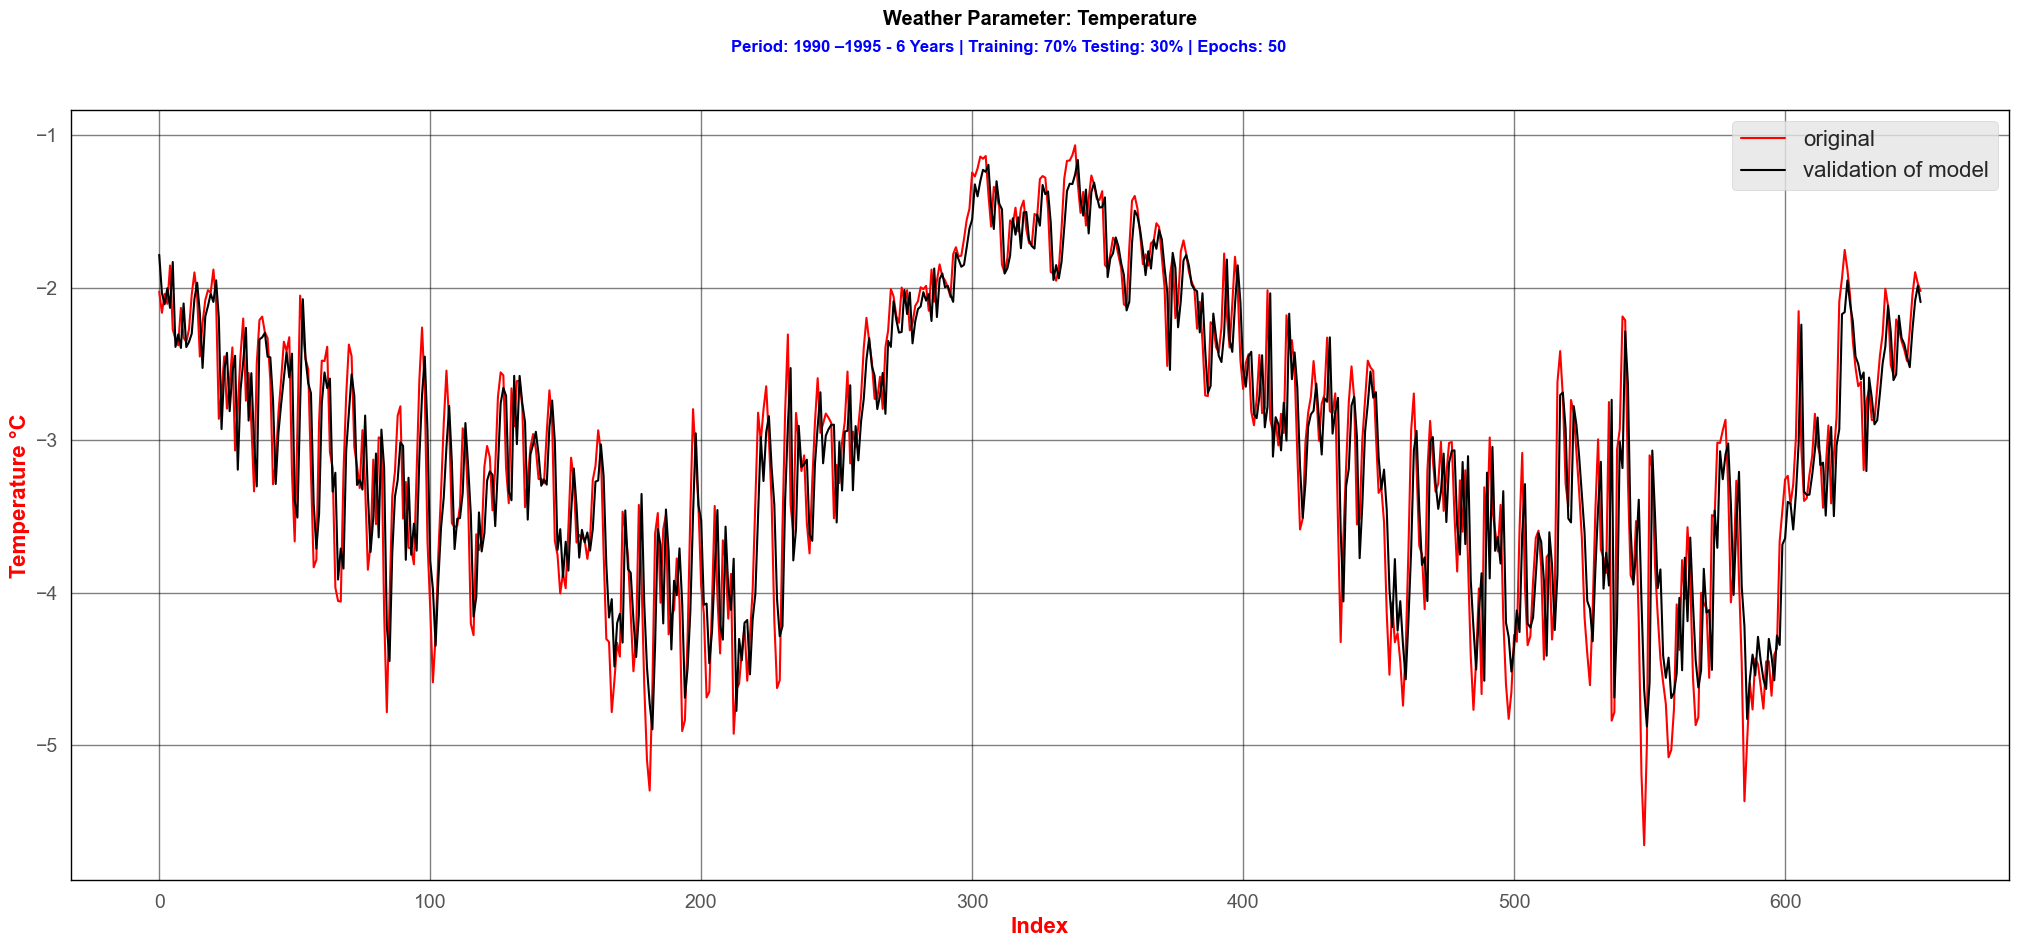

In [25]:
plt.figure(figsize=(25, 10))
plt.plot(y_test_actual, color='red', label="original")
plt.plot(y_pred_actual, color='black', label="validation of model")
plt.title("Weather Parameter: Temperature", color="black", y=1.1, weight="bold", loc='center')
plt.suptitle("Period: 1990 –1995 - 6 Years | Training: 70% Testing: 30% | Epochs: 50", color="blue", y=0.95, weight="bold", ha='center')
plt.xlabel("Index", weight='bold', fontsize=16, color="red")
plt.ylabel("Temperature \u00b0C", weight='bold', fontsize=16, color="red")
plt.legend(fontsize=16)
plt.grid(linewidth=1, alpha=0.5, color='black', which='both')  # add an even grid
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6)
plt.gca().set_facecolor('white')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_actual, y_pred_actual)
print('Mean squared error:', mse)

Mean squared error: 0.14359391219662046
